# Demographic factors impact on SAT scores of NYC high school students

In this project, I will look at how demographic factors such as race, income, and gender affect SAT scores of New York City (NYC) high school students. 

For a brief bit of background, the SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each of which is worth a maximum of 800 points (2400 points in total). Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on student SAT scores by high school, along with additional demographic data sets. In this project, I will be working on 7 datasets:
- SAT scores by school - SAT scores for each high school in New York City.
- School attendance - Attendance information for each school in New York City.
- Class size - Information on class size for each school.
- AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject).
- Graduation outcomes - The percentage of students who graduated, and other outcome information.
- Demographics - Demographic information for each school.
- School survey - Surveys of parents, teachers, and students at each school.

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

First, let import needed libraries and the data:

In [1]:
import pandas as pd
import numpy
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [2]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are nearly 3000 columns, nearly all of which I don't need. I'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it. Thus I will retain only data about how parents, teachers, and students feel about school safety, academic performance, and a few other areas.

In [3]:
survey["DBN"] = survey["dbn"]
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

What I'm mainly interested in is the SAT dataset, which corresponds to the dictionary key `sat_results`. This dataset contains the SAT scores for each high school in New York City. 

In [4]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


- There's only a single row for each high school, with unique school ID (DBN). A quick Google search shows me that DBN or District Borough Number is the combination of the District Number, the letter code for the borough, and the number of the school and indeed unique to each school. 
- Three separate SAT scores are not convenient for analysis so I will combine them into a single column to make the scores easier to analyze.

In [5]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

Next I will explore other datasets to see if I can gain any insight into how to combine them.

In [6]:
for file in data:
    print(data[file].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

- Looks like most dataset have a DBN column. The `class_size` data set doesn't have DBN column but has the information I need to create one. That means I can use a DBN column to combine the data sets. Aggregating data by district will also allow me to use the district mapping data to plot district-by-district differences. First I'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly `Location 1`, which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means I’ll have to do some preprocessing to ensure that each DBN is unique within each data set otherwise I'll run into problems while combining the data sets. 

Creating the `dbn` column for `class_size` dataset:

In [7]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

Next, I will parse the latitude and longitude coordinates for each school. This will enable me to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the `hs_directory` dataset.

In [8]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

Now let's condense the dataset so that each value in the DBN column is unique. While the main dataset we want to analyze, `sat_results`, has unique DBN values for every high school in New York City, other datasets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` dataset, for example. 

In [9]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In the `class_size` dataset, the DBN appears more than once because multiple rows contain information about the same school. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY). Since only high school students take the SAT, I will pick only row where the value in the GRADE column is `09-12`.

In [10]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]

In [11]:
class_size['PROGRAM TYPE'].value_counts(dropna=False).sort_values(ascending=False) 

GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

In [12]:
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


The DBN still isn't completely unique. This is due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns. These columns seem to pertain to different kinds of classes. 

In [13]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. I want our class size data to include every single class a school offers -- not just a subset of them. What I can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

In [14]:
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now that I've finished condensing `class_size`, let's condense `demographics`. Here are the first few rows:

In [15]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


It appears that the only column that prevents a given DBN from being unique is schoolyear. I only want to select rows where schoolyear is `20112012` since it matchs our SAT results data.

In [16]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

Finally, we'll need to condense the graduation data set. Here are the first few rows:

In [17]:
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


The `Demographic` and `Cohort` columns are what prevent DBN from being unique in the graduation data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. I want to pick data from the most recent `Cohort` available, which is `2006`. I also want data from the full cohort, so I'll only pick rows where `Demographic` is `Total Cohort`.

In [18]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

Next I also need to look at the AP test scores. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor. It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To do that, I need tp convert AP score from strings to numeric values.

In [19]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

Now let's combine all datasets together using the DBN and fill missing values:

In [20]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0.0,0.0,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0.0,0.0,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


Looks like everything goes as expected! I will also add a column to the combined dataset that specifies the school district for mapping the statistics out on a school district level.

In [21]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

I will dive into the combined dataset to find any correlations between any of the columns and `sat_score`. This will help me determine which columns might be interesting to plot out or investigate further. 

In [22]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64


Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`, and `sat_score` are strongly correlated with `sat_score`. The number of AP test takers also positively correlated with `sat_score` at a certain level. It is difficult to examine all the correlations since there are many rows. Let's first look at how parents, teachers, and students feel about school correlate with `sat_score`.

In [23]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

In [24]:
correlations[survey_fields]

rr_s          0.232199
rr_t         -0.023386
rr_p          0.047925
N_s           0.423463
N_t           0.291463
N_p           0.421530
saf_p_11      0.122913
com_p_11     -0.115073
eng_p_11      0.020254
aca_p_11      0.035155
saf_t_11      0.313810
com_t_11      0.082419
eng_t_11      0.036906
aca_t_11      0.132348
saf_s_11      0.337639
com_s_11      0.187370
eng_s_11      0.213822
aca_s_11      0.339435
saf_tot_11    0.318753
com_tot_11    0.077310
eng_tot_11    0.100102
aca_tot_11    0.190966
Name: sat_score, dtype: float64

I found that students and teacher perceptions of safety and respect in the school strongly correlated with SAT score, which is surprising.

<AxesSubplot:xlabel='saf_s_11', ylabel='sat_score'>

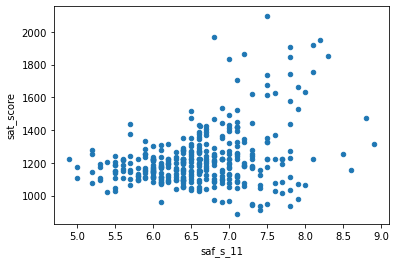

In [25]:
%matplotlib inline
combined.plot.scatter(x='saf_s_11', y='sat_score')

It seems that the strong correlations is due to a cluster of schools that have low safety and respect score and low SAT score. Let's try to compute the average safety score for each borough. First, I will need to extract the borough code from the unique DBN of each school.

In [26]:
combined['borough'] = combined['DBN'].str.extract(r"\d{2}(\w)\d{3}")

In [27]:
combined['borough'].value_counts()

K    106
X     93
M     90
Q     64
R     10
Name: borough, dtype: int64

In [28]:
borough_dict = {'K':'Brooklyn', 'X':'Bronx', 'M':'Manhattan', 'Q':'Queens', 'R':'Staten Island'}

In [29]:
combined['borough'] = combined['borough'].map(borough_dict)
print(combined['borough'].head())

0    Manhattan
1    Manhattan
2    Manhattan
3    Manhattan
4    Manhattan
Name: borough, dtype: object


In [30]:
mean_combined = combined.groupby(by='borough').agg('mean')

In [31]:
print(mean_combined['saf_tot_11'])

borough
Bronx            7.322581
Brooklyn         7.129245
Manhattan        7.473333
Queens           7.387500
Staten Island    7.200000
Name: saf_tot_11, dtype: float64


Manhattan havs highest safety and respect score, followed by Queens and Bronx. Brooklyn has the lowest score. This is in agreement with the data on rates of violent crime per capita: https://www.addressreport.com/blog/safest-neighborhoods-in-nyc-most-dangerous-neighborhoods-in-nyc/

There are a few columns that indicate the percentage of each race at a given school. By plotting out the correlations between these columns and sat_score, I can determine whether there are any racial differences in SAT performance.

<AxesSubplot:>

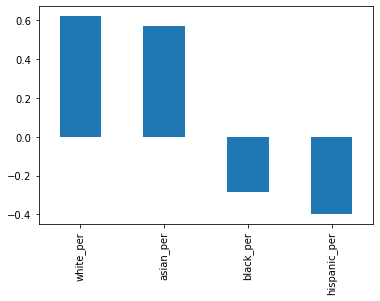

In [32]:
race_cols = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
correlations[race_cols].plot(kind='bar')

This shows that schools with high percentage of white and Asian people have high average SAT score, and schools with high percentage of black and Latino people have low average SAT score. 

This could indicate that white and Asian people achive higher SAT score than black and Latino people. Let's dig deeper to check whether the SAT test is unfair to black and Latino people:

In [33]:
print(combined['hispanic_per'])

0      53.8
1      45.9
2      55.4
3      56.9
4      14.2
       ... 
358    88.1
359    68.7
360    70.4
361    79.5
362    77.3
Name: hispanic_per, Length: 363, dtype: float64


In [34]:
low_sat_high_hispanic = combined[(combined['sat_score'] < 1400) & (combined['hispanic_per'] > 50.0)]

<AxesSubplot:xlabel='hispanic_per', ylabel='sat_score'>

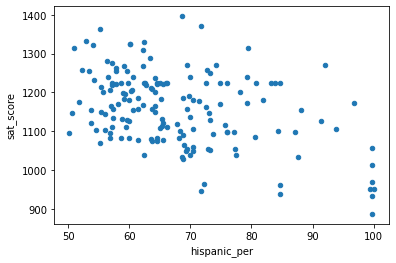

In [35]:
%matplotlib inline
low_sat_high_hispanic.plot.scatter(x='hispanic_per', y='sat_score')

Most schools with high hispanic percentage have average SAT score around 1000-1400. Only a few school have average SAT < 1000. These schools have more than 70% students with hispanic race. Let's have a look at schools with high hispanic student percentage:

In [36]:
hispanic_schools = combined[combined['hispanic_per'] > 95]['school_name']

In [37]:
print(hispanic_schools)

44                         Manhattan Bridges High School
82      Washington Heights Expeditionary Learning School
89     Gregorio Luperon High School for Science and M...
125                  Academy for Language and Technology
141                International School for Liberal Arts
176     Pan American International High School at Monroe
253                            Multicultural High School
286               Pan American International High School
Name: school_name, dtype: object


A quick search on Google reveals that these schools have very high percentage of English learner (on average 64.6%). The Washington Heights Expeditionary Learning School has the lowest percentage of English learner, but has a high percentage of students with disability (23%) while other schools (on the `hispanic_schools` list) have less than 5% students with disability. 

In [38]:
high_sat_low_hispanic = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]

In [39]:
print(high_sat_low_hispanic['school_name'])

37                                Stuyvesant High School
151                         Bronx High School of Science
187                       Brooklyn Technical High School
327    Queens High School for the Sciences at York Co...
356                  Staten Island Technical High School
Name: school_name, dtype: object


In constrast, schools with very high average SAT score are dominated by Asian students (avg. 66.6%) and white students (avg. 22.6%)
Asian, with 0% of students are English learners and also low percentage of students with disability (0-2%). These results show that the average SAT score is influenced by race and English learning.

Now let's see if gender has an impact on average SAT score as well:

<AxesSubplot:>

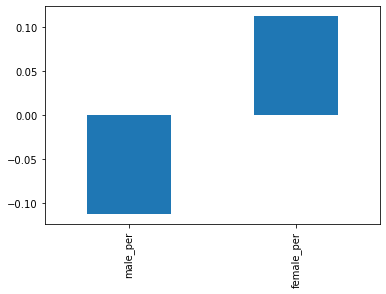

In [40]:
gender_cols = ['male_per','female_per']
correlations[gender_cols].plot(kind='bar')

The bar plot show that schools with higher female percentage achieved higher average SAT score, and schools with higher male percentage achieved lower average SAT score. This could indiate that female perform better than male in SAT score.

In [41]:
print(combined['female_per'].head())

0    38.6
1    42.6
2    45.3
3    53.7
4    50.8
Name: female_per, dtype: float64


In [42]:
high_sat_high_female = combined[(combined['sat_score'] > 1500) & (combined['female_per'] > 50)]

In [43]:
print(high_sat_high_female['school_name'])

4      New Explorations into Science, Technology and ...
5                         Bard High School Early College
22              Professional Performing Arts High School
23                     Baruch College Campus High School
24           N.Y.C. Lab School for Collaborative Studies
26                         Eleanor Roosevelt High School
27                                Millennium High School
60                                    Beacon High School
61     Fiorello H. LaGuardia High School of Music & A...
278       Leon M. Goldstein High School for the Sciences
287                Bard High School Early College Queens
302                          Townsend Harris High School
304                      Benjamin N. Cardozo High School
314                                    Scholars' Academy
325    Queens Gateway to Health Sciences Secondary Sc...
346            Baccalaureate School for Global Education
Name: school_name, dtype: object


In [44]:
print(combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]['school_name'])

5                         Bard High School Early College
26                         Eleanor Roosevelt High School
60                                    Beacon High School
61     Fiorello H. LaGuardia High School of Music & A...
302                          Townsend Harris High School
Name: school_name, dtype: object


Schools with high SAT scores and a high female percentage are dominated by whitle students and have 0% of English learners. 

Now let's look at how the number of students at a school who took AP exams correlates with the school's SAT scores. Because total_enrollment is highly correlated with sat_score, I don't want to bias our results. Instead, I'll look at the percentage of students in each school who took at least one AP exam.

In [45]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

<AxesSubplot:xlabel='ap_per', ylabel='sat_score'>

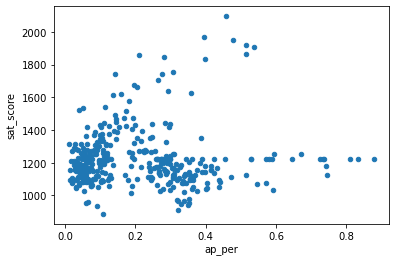

In [46]:
combined.plot.scatter(x='ap_per', y='sat_score')

The plot show weak correlation between the percentage of students who took at least one AP exam and the school average SAT score. It seems that schools with low percentage of AP test takers correlate to low SAT score (< 1400). This does not apply to schools with high percentage of AP test takers.